<a href="https://colab.research.google.com/github/Yassminat/2020-fall-data-science/blob/master/Week9-Neural-Networks/Week9_Neural_Networks_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Layers for our neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# A pretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

# Our normal python data science stack you've come to know and love
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

print(tf.__version__)

2.3.0


You're going to use a neural network to make predictions on the MNIST Fashion data set.  Check out the documentation here, make sure you check the size of the images and how many classes are in the data set https://keras.io/api/datasets/fashion_mnist/

In [ ]:
# switch runtime to GPU

In [ ]:
# load the fashion mnist data set using tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Checking data 
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Checking x_train shape 
X_train.shape

(60000, 28, 28)

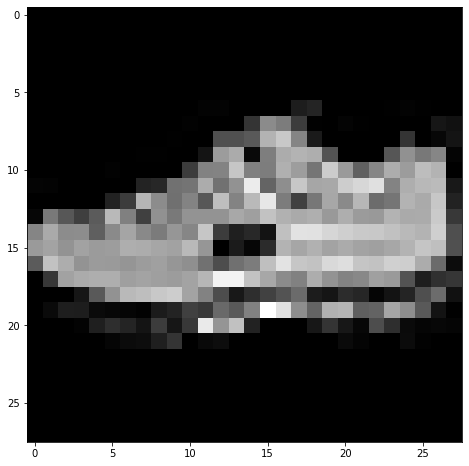

In [ ]:
# View an image from the dataset 
plt.figure(figsize=(8, 8))
img = X_train[699]
img = img.reshape(28, 28)
plt.imshow(img, cmap='gray')

In [ ]:
# divide the values by 255 and reshape 
X_train = X_train/255 
X_test = X_test/255

In [ ]:
# # reshaping 
X_train = X_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1)

In [ ]:
# build the architecture of your model using Sequential()
# you can use the same architecture we used in class, try to put your own spin on it, or copy another existing architecture
# make sure you set the correct input shape and the correct parameters for the last dense layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(28,28, 1),filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))

# Flatten layer 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Including 10 for number of classes, and softmax since this is a multiclass problem
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile your model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# fit your model
epochs = 20 
model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5820 - acc: 0.7802 - val_loss: 0.3786 - val_acc: 0.8543
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3597 - acc: 0.8700 - val_loss: 0.3034 - val_acc: 0.8848
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3071 - acc: 0.8898 - val_loss: 0.3043 - val_acc: 0.8868
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2777 - acc: 0.8995 - val_loss: 0.2765 - val_acc: 0.8975
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2568 - acc: 0.9066 - val_loss: 0.2562 - val_acc: 0.9097
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2411 - acc: 0.9133 - val_loss: 0.2547 - val_acc: 0.9105
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2284 - acc: 0.9173 - val_loss: 0.2721 - val_acc: 0.9040
Epoch 8/20
1688/1688 [==============================] - 6s 4ms

In [ ]:
# evaluate your results
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2846 - acc: 0.9158


[0.2846020460128784, 0.9157999753952026]